In [537]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [538]:
df = pd.read_csv('Desktop/vehicles.csv',nrows=10000)
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7316825923,https://phoenix.craigslist.org/evl/ctd/d/mesa-...,phoenix,https://phoenix.craigslist.org,15999,2015.0,gmc,acadia sle-1,good,6 cylinders,...,full-size,SUV,red,https://images.craigslist.org/00Y0Y_iukNOte9S5...,2015 GMC Acadia SLE-1 Financing Available!!! 6...,NaN,az,33.415592,-111.657979,2021-05-04T10:48:28-0700
9996,7316825904,https://phoenix.craigslist.org/evl/ctd/d/mesa-...,phoenix,https://phoenix.craigslist.org,6999,2012.0,ford,focus sel hatchback,good,4 cylinders,...,mid-size,hatchback,silver,https://images.craigslist.org/00i0i_kWRkjnGmCZ...,2012 Ford Focus SEL Hatchback Loaded!!! 4 CYL ...,NaN,az,33.415592,-111.657937,2021-05-04T10:48:27-0700
9997,7316825646,https://phoenix.craigslist.org/evl/ctd/d/mesa-...,phoenix,https://phoenix.craigslist.org,24999,2015.0,ram,1500 big horn,good,8 cylinders,...,full-size,pickup,silver,https://images.craigslist.org/00l0l_9KhJhGzJE5...,2015 Ram 1500 Quad Cab Big Horn HEMI!!! 8 CYL ...,NaN,az,33.415592,-111.657915,2021-05-04T10:48:02-0700
9998,7316825626,https://phoenix.craigslist.org/evl/ctd/d/mesa-...,phoenix,https://phoenix.craigslist.org,7999,2011.0,ford,fusion sel,good,4 cylinders,...,full-size,sedan,grey,https://images.craigslist.org/00101_az5R00dbXW...,2011 Ford Fusion SEL Nicely Loaded!!! 4 CYL En...,NaN,az,33.415628,-111.657958,2021-05-04T10:48:00-0700


In [539]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [540]:
df['title_status'].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [541]:
#lets see about VIN, paint_color, county columns later. for now drop it.
#try to add county column later 

In [542]:
df=df.drop(['id', 'url', 'region_url', 'VIN', 'paint_color', 'image_url', 'description', 'posting_date', 'county', 'lat','long'], axis=1)

In [543]:
df.isnull().sum()

region             0
price              0
year             113
manufacturer     483
model            129
condition       4653
cylinders       3287
fuel             122
odometer          58
title_status     247
transmission      83
drive           2899
size            7400
type            1851
state              0
dtype: int64

In [544]:
df['price'].max()

987654321

In [545]:
count = (df['price'] < 1000).sum()
count

447

In [546]:
df.drop(df[df['price'] <= 100].index, inplace = True)

In [547]:
df['price'].min()

125

In [548]:
df['year'].isnull()

0        True
1        True
2        True
3        True
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: year, Length: 9663, dtype: bool

In [549]:
df['age'] = 2022 - df['year']

In [550]:
df=df.drop(['year'],axis=1)

In [551]:
df.columns
df.median()

price       21000.0
odometer    67277.0
age             7.0
dtype: float64

In [552]:
df['age'] = df['age'].fillna(df['age'].median())

In [553]:
df['age'].isnull().sum()

0

C:\Users\Akshara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='odometer', ylabel='Density'>

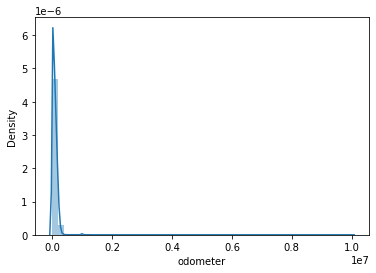

In [554]:
sns.distplot(df['odometer'])

C:\Users\Akshara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Akshara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='odometer', ylabel='Density'>

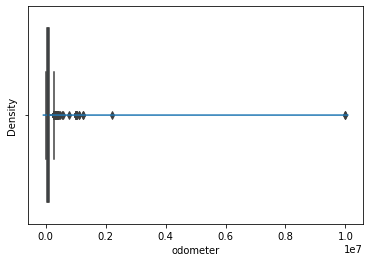

In [555]:
sns.boxplot(df.odometer)
sns.distplot(df.odometer)

In [556]:
df.skew(axis = 0, skipna = True)

price       96.908474
odometer    44.739997
age          3.505830
dtype: float64

In [557]:
#since the data is highly skewed, replacing null values with median

In [558]:
df['odometer'].median()

67277.0

In [559]:
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

In [560]:
df['odometer'].isnull().sum()

0

In [561]:
df.isnull().sum()

region             0
price              0
manufacturer     445
model            118
condition       4474
cylinders       3165
fuel             115
odometer           0
title_status     235
transmission      75
drive           2750
size            7169
type            1729
state              0
age                0
dtype: int64

In [562]:
df['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [563]:
df['title_status'].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [564]:
df['title_status'].mode()

0    clean
dtype: object

In [565]:
df['title_status']=df['title_status'].fillna('clean')

In [566]:
df.isnull().sum()

region             0
price              0
manufacturer     445
model            118
condition       4474
cylinders       3165
fuel             115
odometer           0
title_status       0
transmission      75
drive           2750
size            7169
type            1729
state              0
age                0
dtype: int64

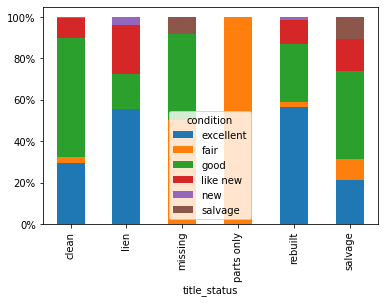

In [567]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

df.groupby(['title_status','condition']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [568]:
df['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

In [569]:
df.loc[((df['title_status'] == 'clean') | (df['title_status'] == 'salvage')) & (df['condition'].isna()), 'condition'] = 'good'
df.loc[((df['title_status'] == 'lien') | (df['title_status'] == 'rebuilt')) & (df['condition'].isna()), 'condition'] = 'excellent'
df.loc[(df['title_status'] == 'missing') | (df['title_status'] == 'parts only') & (df['condition'].isna()), 'condition'] = 'fair'

In [570]:
df.isnull().sum()

region             0
price              0
manufacturer     445
model            118
condition          0
cylinders       3165
fuel             115
odometer           0
title_status       0
transmission      75
drive           2750
size            7169
type            1729
state              0
age                0
dtype: int64

In [571]:
df['type'].mode()

0    SUV
dtype: object

In [572]:
df['type']=df['type'].fillna('SUV')

In [573]:
df.isnull().sum()

region             0
price              0
manufacturer     445
model            118
condition          0
cylinders       3165
fuel             115
odometer           0
title_status       0
transmission      75
drive           2750
size            7169
type               0
state              0
age                0
dtype: int64

In [574]:
df['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [575]:
df['type'].unique()

array(['SUV', 'pickup', 'truck', 'other', 'coupe', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'convertible', 'wagon',
       'van'], dtype=object)

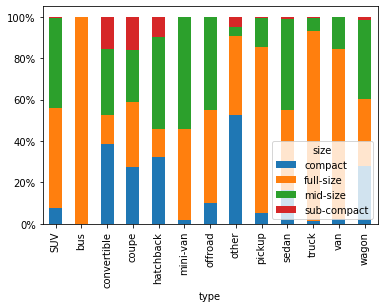

In [576]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

df.groupby(['type','size']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [577]:
#suv,pickup,truck,other,coupe,van,hatchback,sedan,mini-van,offroad,wagon, convertible - midsize
#bus - fullsize

In [578]:
df.loc[(df['type'] == 'bus') | (df['type'] == 'SUV') | (df['type'] == 'coupe') | (df['type'] == 'offroad') | (df['type'] == 'pickup') | (df['type'] == 'truck') | (df['type'] == 'van') & (df['size'].isna()), 'size'] = 'full-size'
df.loc[(df['type'] == 'hatchback') | (df['type'] == 'mini-van') | (df['type'] == 'sedan') | (df['type'] == 'wagon') & (df['size'].isna()), 'size'] = 'mid-size'
df.loc[(df['type'] == 'convertible') | (df['type'] == 'other') & (df['size'].isna()), 'size'] = 'compact'

In [579]:
df.isnull().sum()
# df['size'].unique()
# df['size'].isna()

region             0
price              0
manufacturer     445
model            118
condition          0
cylinders       3165
fuel             115
odometer           0
title_status       0
transmission      75
drive           2750
size               0
type               0
state              0
age                0
dtype: int64

In [580]:
df['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

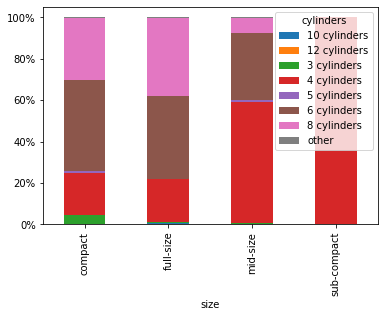

In [581]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

df.groupby(['size','cylinders']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [582]:
df.loc[(df['size'] == 'compact') & (df['cylinders'].isna()), 'cylinders'] = '6 cylinders'
df.loc[(df['size'] == 'full-size') & (df['cylinders'].isna()), 'cylinders'] = '8 cylinders'
df.loc[(df['size'] == 'mid-size') | (df['size'] == 'sub-compact') & (df['cylinders'].isna()), 'cylinders'] = '4 cylinders'

In [583]:
df.isnull().sum()

region             0
price              0
manufacturer     445
model            118
condition          0
cylinders          0
fuel             115
odometer           0
title_status       0
transmission      75
drive           2750
size               0
type               0
state              0
age                0
dtype: int64

In [584]:
df['transmission'].unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [585]:
df['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [586]:
df['fuel'].unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [587]:
df['fuel'].mode()

0    gas
dtype: object

In [588]:
df['fuel']=df['fuel'].fillna('gas')

In [589]:
df.isnull().sum()

region             0
price              0
manufacturer     445
model            118
condition          0
cylinders          0
fuel               0
odometer           0
title_status       0
transmission      75
drive           2750
size               0
type               0
state              0
age                0
dtype: int64

In [590]:
df['transmission']=df['transmission'].fillna('other')

In [591]:
df['manufacturer']=df['manufacturer'].fillna('ford')
df['model']=df['model'].fillna('f-150')

In [592]:
df.isnull().sum()

region             0
price              0
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
title_status       0
transmission       0
drive           2750
size               0
type               0
state              0
age                0
dtype: int64

In [593]:
df.dropna(subset=['drive'], inplace=True)

In [594]:
#df['drive']=df['drive'].fillna('0.0')
df.isnull().sum()

region          0
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
state           0
age             0
dtype: int64

In [595]:
from sklearn.model_selection import train_test_split
y=df['price']

In [596]:
df.dtypes

region           object
price             int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
state            object
age             float64
dtype: object

In [597]:
df2 = df[['region','manufacturer', 'model', 'cylinders', 'drive', 'condition', 'fuel', 'title_status', 'transmission', 'size', 'type', 'state']].copy()

In [598]:
df2 = df2.astype(str)

In [599]:
df1=df[['odometer','age']].copy()

In [600]:
df['region'].unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix'], dtype=object)

In [601]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df2.columns:
    if df2[column_name].dtype == object:
        df2[column_name] = le.fit_transform(df2[column_name])
    else:
        pass

In [602]:
result = df1.join(df2)
result

,odometer,age,region,manufacturer,model,cylinders,drive,condition,fuel,title_status,transmission,size,type,state
31,128000.0,9.0,1,11,781,5,2,0,2,0,0,1,10,1
32,68696.0,10.0,1,12,1478,6,0,2,2,0,2,1,8,1
33,29499.0,6.0,1,6,1495,5,0,2,2,0,2,1,8,1
34,43000.0,3.0,1,35,1624,5,0,0,2,0,0,1,10,1
35,17302.0,6.0,1,6,517,5,0,2,2,0,2,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,135000.0,7.0,13,12,302,5,1,2,2,0,0,1,0,2
9996,153000.0,10.0,13,11,884,3,1,2,2,0,0,2,4,2
9997,107000.0,7.0,13,30,8,6,2,2,2,0,0,1,8,2
9998,121000.0,11.0,13,11,919,3,1,2,2,0,0,2,9,2


In [603]:
X_train, X_test, y_train, y_test = train_test_split(result, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5530, 14) (5530,)
(1383, 14) (1383,)


In [604]:
!pip install scikit-learn

In [605]:
import sys
!{sys.executable} -m pip install xgboost

In [606]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier

In [607]:
regressor = RandomForestRegressor(max_depth=2, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [608]:
yhat = regressor.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 7536.628


In [609]:
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,yhat)
print('MSE: %.3f' % mse)  
print('RMSE: %.3f' % rmse)
print('r2_score: %.3f' % r2)

MSE: 131661602.263
RMSE: 11474.389
r2_score: 0.400


In [610]:
model = xgb.XGBRegressor(max_depth=5, n_estimators=60)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [611]:
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,yhat)
print('MSE: %.3f' % mse)  
print('RMSE: %.3f' % rmse)
print('r2_score: %.3f' % r2)

MAE: 3886.771
MSE: 61145437.230
RMSE: 7819.555
r2_score: 0.722


In [612]:
model1 = ExtraTreesRegressor()
model1.fit(X_train, y_train)

ExtraTreesRegressor()

In [613]:
yhat = model1.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,yhat)
print('MSE: %.3f' % mse)  
print('RMSE: %.3f' % rmse)
print('r2_score: %.3f' % r2)

MAE: 2827.418
MSE: 57551115.159
RMSE: 7586.245
r2_score: 0.738


In [614]:
dtc = DecisionTreeClassifier(random_state=42)
dtc = dtc.fit(X_train, y_train)
yhat = dtc.predict(X_test)

In [615]:
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,yhat)
print('MSE: %.3f' % mse)  
print('RMSE: %.3f' % rmse)
print('r2_score: %.3f' % r2)

MAE: 4583.244
MSE: 106040307.155
RMSE: 10297.587
r2_score: 0.517
